## Stock Prediction

In [120]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


### Read data & Separate Train/Test Sets

Index(['Date', 'Open', 'High', 'Low', 'Close(t)', 'Volume', 'SD20',
       'Upper_Band', 'Lower_Band', 'S_Close(t-1)', 'S_Close(t-2)',
       'S_Close(t-3)', 'S_Close(t-5)', 'S_Open(t-1)', 'MA5', 'MA10', 'MA20',
       'MA50', 'MA200', 'EMA10', 'EMA20', 'EMA50', 'EMA100', 'EMA200', 'MACD',
       'MACD_EMA', 'ATR', 'ADX', 'CCI', 'ROC', 'RSI', 'William%R', 'SO%K',
       'STD5', 'ForceIndex1', 'ForceIndex20', 'Date_col', 'Day', 'DayofWeek',
       'DayofYear', 'Week', 'Is_month_end', 'Is_month_start', 'Is_quarter_end',
       'Is_quarter_start', 'Is_year_end', 'Is_year_start', 'Is_leap_year',
       'Year', 'Month', 'QQQ_Close', 'QQQ(t-1)', 'QQQ(t-2)', 'QQQ(t-5)',
       'QQQ_MA10', 'QQQ_MA20', 'QQQ_MA50', 'SnP_Close', 'SnP(t-1))',
       'SnP(t-5)', 'DJIA_Close', 'DJIA(t-1))', 'DJIA(t-5)', 'Close_forcast'],
      dtype='object')


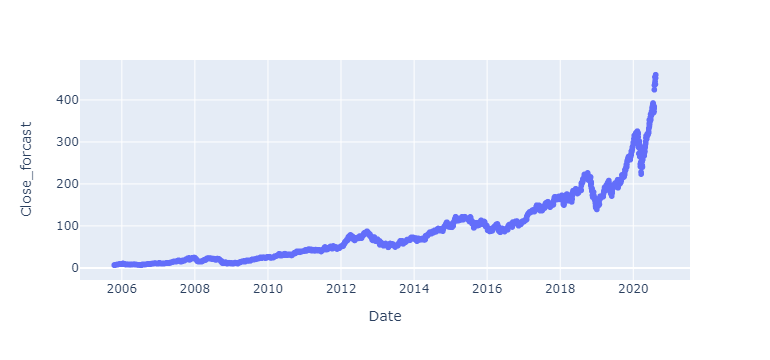

In [169]:
df = pd.read_csv('data-regression/Stock/AAPL.csv')
print(df.columns)

fig = px.scatter(df,x='Date',y='Close_forcast')
fig.show()

In [176]:
X = df[['Open', 'High', 'Low', 'Close(t)', 'Volume', 'SD20',
       'Upper_Band', 'Lower_Band', 'S_Close(t-1)', 'S_Close(t-2)',
       'S_Close(t-3)', 'S_Close(t-5)', 'S_Open(t-1)', 'MA5', 'MA10', 'MA20',
       'MA50', 'MA200', 'EMA10', 'EMA20', 'EMA50', 'EMA100', 'EMA200', 'MACD',
       'MACD_EMA', 'ATR', 'ADX', 'CCI', 'ROC', 'RSI', 'William%R', 'SO%K',
       'STD5', 'ForceIndex1', 'ForceIndex20', 'Day', 'DayofWeek',
       'DayofYear', 'Week', 'Is_month_end', 'Is_month_start', 'Is_quarter_end',
       'Is_quarter_start', 'Is_year_end', 'Is_year_start', 'Is_leap_year',
       'Year', 'Month', 'QQQ_Close', 'QQQ(t-1)', 'QQQ(t-2)', 'QQQ(t-5)',
       'QQQ_MA10', 'QQQ_MA20', 'QQQ_MA50', 'SnP_Close', 'SnP(t-1))',
       'SnP(t-5)', 'DJIA_Close', 'DJIA(t-1))', 'DJIA(t-5)']] #remove 'Date', 'Date_col', 'Close_forcast'
y = df[['Close_forcast']]

In [177]:
n_train = int(0.7*len(X))
n_test = len(X)-n_train
print(n_train)
print(n_test)
print(len(X))

2612
1120
3732


In [178]:
X_train, X_test = X[:n_train], X[-n_test:]
y_train, y_test = y[:n_train], y[-n_test:]

### Create Linear Regression Model

In [179]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### Coefficient and Intercept

In [182]:
print('Coefficient:', model.coef_)
print('Intercept:',model.intercept_)


Coefficient: [[-5.87167744e-03  2.27454398e-01  9.99484021e-02  7.64102957e-01
  -1.98710704e-10  3.51368004e-03  1.11533293e-01  9.74785775e-02
  -9.16983425e-02  1.00051471e-01  7.44233827e-02  5.17747889e-02
  -2.21087244e-02 -2.78204588e-01 -2.22497984e-02  1.04505935e-01
   7.73908160e-02 -7.10190798e-03 -5.80387935e-02 -5.80387935e-02
  -5.80387935e-02 -5.80387935e-02 -5.80387935e-02  1.43705665e+00
  -8.14131178e-01  5.28046151e-02 -1.45342111e-03  4.88802818e-10
  -4.16489440e-03  4.97606558e-03  7.46406413e-04  7.46406178e-04
  -9.43560448e-01 -7.58432761e-11 -4.79671858e-12  1.31564725e-02
   3.17781063e-02 -1.16682812e-02  7.23410041e-03 -7.38960336e-02
   6.71066948e-04  2.87972479e-02  8.76455234e-02  4.55840639e-01
   3.41532358e-14 -4.42453918e-02  1.06337259e-01  3.29856058e-01
   5.53204225e-02 -8.92869792e-02 -4.82085667e-02 -4.02049602e-02
   1.23735384e-01 -8.00435391e-02  6.49311071e-02  5.72600262e-03
   8.27062827e-04 -5.49957125e-03 -8.34955951e-04  3.07713368e-

### Prediction

In [185]:
#test set
y_pred = model.predict(X_test)



In [188]:
results = pd.DataFrame()
results['Date'] = df['Date'][-n_test:]
results['Actual'] = y_test
results['Predict'] = y_pred
results

,Date,Actual,Predict
2612,2016-03-04,95.06,96.230955
2613,2016-03-07,94.27,94.761517
2614,2016-03-08,94.36,94.124214
2615,2016-03-09,94.40,94.347292
2616,2016-03-10,95.42,94.391643
...,...,...,...
3727,2020-08-07,450.91,441.364272
3728,2020-08-10,437.50,448.258570
3729,2020-08-11,452.04,436.191383
3730,2020-08-12,460.04,450.074716


### Evaluation
Mean Squared Error (MSE)

$$MSE = \frac{1}{n}\sum_{i=1}^n (y_i-\hat{y}_i)^2$$

In [189]:
mse =  np.power((y_test - y_pred),2).sum()/len(y_test)
print('Mean Squared Error (MSE)  : ', np.round(mse,2))

Mean Squared Error (MSE)  :  Close_forcast    19.76
dtype: float64


### Plotting for comparing Actual & Predict 

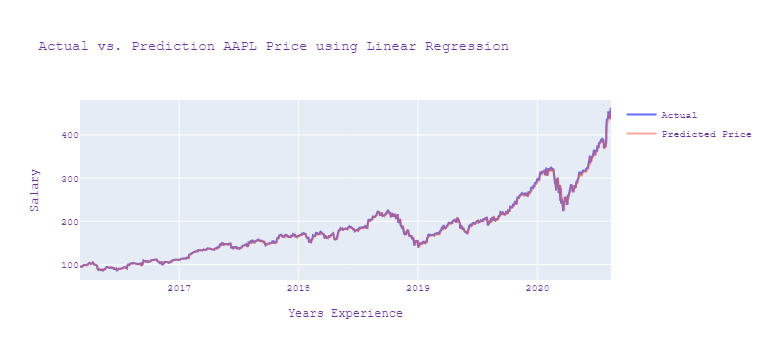

In [194]:
import plotly.graph_objects as go

fig = go.Figure([
    go.Scatter(x=results['Date'], y=results['Actual'], name='Actual'),
    go.Scatter(x=results['Date'], y=results['Predict'], name='Predicted Price',opacity=0.5 )
])

fig.update_layout(
    title="Actual vs. Prediction AAPL Price using Linear Regression",
    xaxis_title="Years Experience",
    yaxis_title="Salary",
    font=dict(
        family="Courier New, monospace",
        size=10,
        color="RebeccaPurple"
    )
)

fig.show()

